<a href="https://colab.research.google.com/github/RajBharti25/ILD/blob/master/HRCT_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/ILD

/content/drive/My Drive/Colab Notebooks/ILD


In [4]:
pip install pydicom

     |████████████████████████████████| 35.3MB 109kB/s 


In [0]:
import matplotlib.pyplot as plt
import pydicom as dicom
import numpy as np
import pandas as pd
import os

In [0]:
PathDicom = "/content/drive/My Drive/Colab Notebooks/ILD/ILD on HRCT/Geneva HRCT Data/ILD_DB_txtROIs/3"
lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))
lstFilesDCM=sorted(lstFilesDCM)

In [56]:
print('lstFilesDCM[0]:',lstFilesDCM[0])
print('\n\nTotal number of attribute in the given Dicom coded metadata are as below\n')
dicom.read_file(lstFilesDCM[0])

lstFilesDCM[0]: /content/drive/My Drive/Colab Notebooks/ILD/ILD on HRCT/Geneva HRCT Data/ILD_DB_txtROIs/3/CT-7358-0001.dcm


Total number of attribute in the given Dicom coded metadata are as below



(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113704.1.111.1776.1141391355.2008
(0008, 0020) Study Date                          DA: '20060303'
(0008, 0030) Study Time                          TM: '140654.000000'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CT'
(0008, 0090) Referring Physician's Name          PN: ' '
(0008, 103e) Series Description                  LO: 'INSPIRIUM'
(0010, 0010) Patient's Name                      PN: 'Anonymous'
(0010, 0020) Patient ID                          LO: 'Anonymous-ID'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'M'
(0010, 1010) Patient's Age                       AS: '081Y'
(0018, 0022) Scan Options                        CS: 'HELIX'
(0018, 0050) Slice Thickness     

In [0]:
# Get ref file
RefDs = dicom.read_file(lstFilesDCM[0])

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))

# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

In [0]:
#calculate the axes
x = np.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = np.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = np.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

In [0]:
# The array is sized based on 'ConstPixelDims'
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)

# loop through all the DICOM files
for filenameDCM in lstFilesDCM:
    # read the file
    ds = dicom.read_file(filenameDCM)
    # store the raw image data
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array 

In [30]:
ArrayDicom.shape

(512, 512, 28)

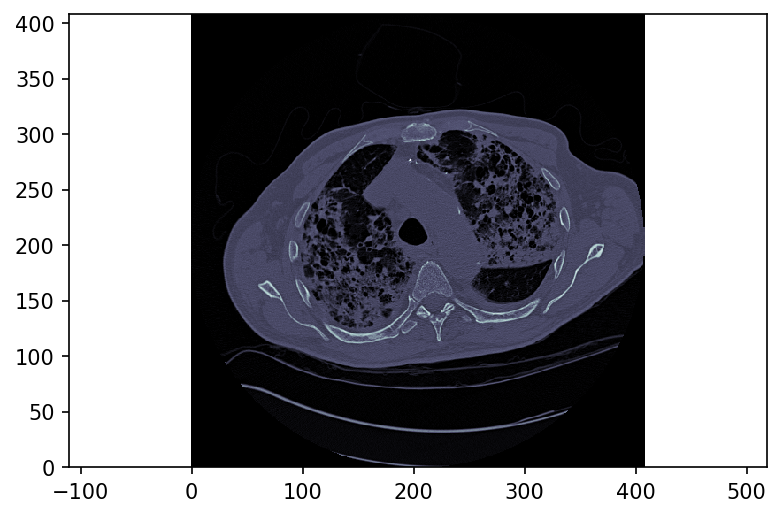

In [43]:
plt.figure(dpi=150)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.cm.bone)
plt.pcolormesh(x, y, np.flipud(ArrayDicom[:, :, 1]))

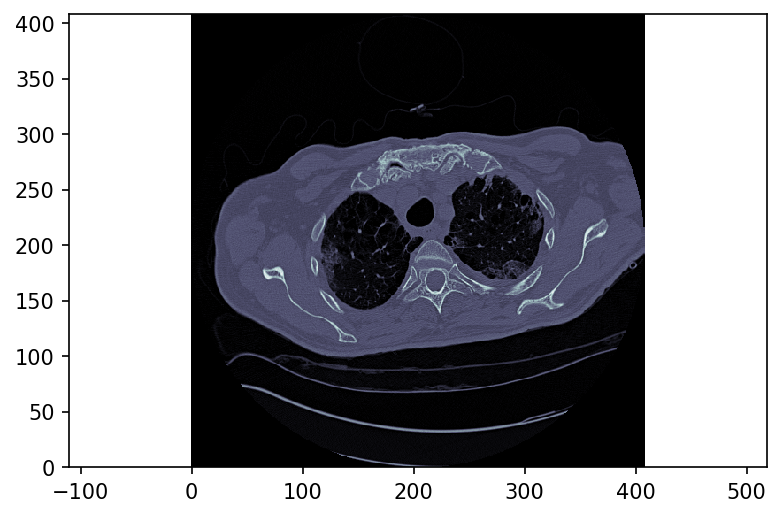

In [46]:
plt.figure(dpi=150)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.cm.bone)
plt.pcolormesh(x, y, np.flipud(ArrayDicom[:, :, 5]))

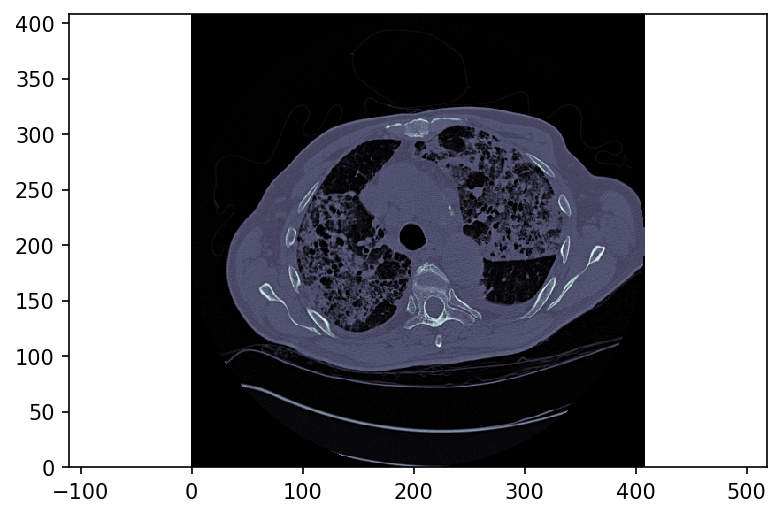

In [47]:
plt.figure(dpi=150)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.cm.bone)
plt.pcolormesh(x, y, np.flipud(ArrayDicom[:, :, 10]))

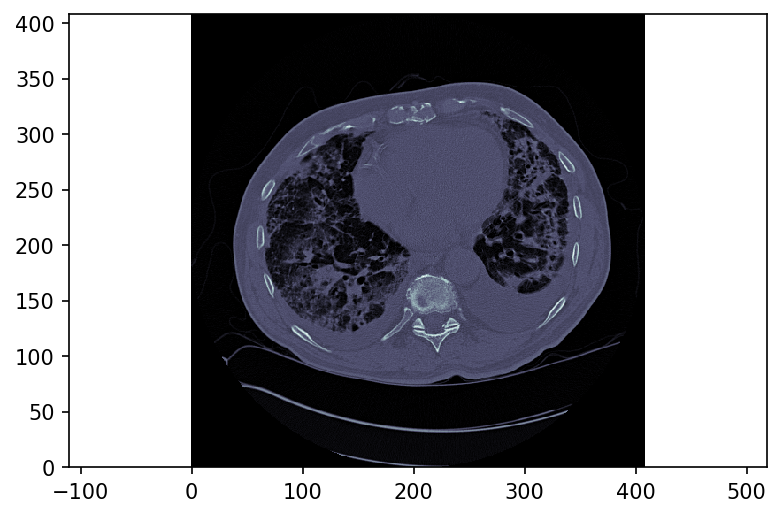

In [48]:
plt.figure(dpi=150)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.cm.bone)
plt.pcolormesh(x, y, np.flipud(ArrayDicom[:, :, 20]))

#plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)